# Fig 7.11

Model of phage lambda decision switch

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.default(linewidth=2)

Model

In [2]:
function build_model_711(;name)
    @independent_variables t
    D = Differential(t)
    @variables r(t) = 0.0 c(t) = 0.0
    @parameters begin
        K1=1
        K2=0.1
        K3=5
        K4=0.5
        delta_r=0.02
        delta_c=0.02
        a=5
        b=50
    end
    rd = r / 2
    cd = c / 2
    f1 = K1 * rd^2
    f2 = K2 * rd
    f3 = K3 * cd
    f4 = K4 * cd
    den = 1 + f1 * (1 + f2) + f3 * (1 + f4)
    eqs = [
        D(r) ~ a * (1 + 10 * f1) / den - delta_r * r,
        D(c) ~ b * (1 + f3) / den - delta_c * c
    ]
    return ODESystem(eqs, t; name)
end

@mtkbuild sys = build_model_711()

Model sys:
Equations (2):
  2 standard: see equations(sys)
Unknowns (2): see unknowns(sys)
  r(t) [defaults to 0.0]
  c(t) [defaults to 0.0]
Parameters (8): see parameters(sys)
  delta_r [defaults to 0.02]
  a [defaults to 5]
  K2 [defaults to 0.1]
  K1 [defaults to 1]
  ⋮

## Fig 7.11 (A)

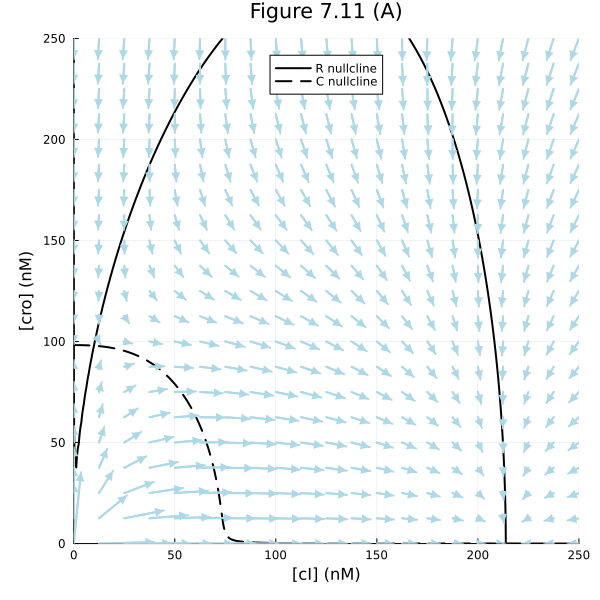

In [3]:
tend = 6000.0
prob = ODEProblem(sys, [], tend)

∂R = (x, y) -> prob.f([x, y], prob.p, nothing)[1]
∂C = (x, y) -> prob.f([x, y], prob.p, nothing)[2]

∂F = function (x, y; scale=0.2)
    dR, dC = prob.f([x, y], prob.p, nothing)
    s = sqrt(hypot(dR, dC)) * scale
    return (dR / s, dC / s)
end

rx = range(0, 250, 201)
ry = range(0, 250, 201)
rxy = range(0, 250, 21)
xx = [x for y in rxy, x in rxy]
yy = [y for y in rxy, x in rxy]

fig = plot(title="Figure 7.11 (A)")
contour!(fig, rx, ry, ∂R, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="R nullcline")
contour!(fig, rx, ry, ∂C, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="C nullcline")
quiver!(fig, xx, yy, quiver=∂F, line=(:lightblue), arrow=(:closed))

plot!(fig, xlims=(0, 250), ylims=(0, 250), xlabel="[cI] (nM)", ylabel="[cro] (nM)", aspect_ratio=:equal, legend=:top, size=(600, 600))

## Fig 7.11 (B)

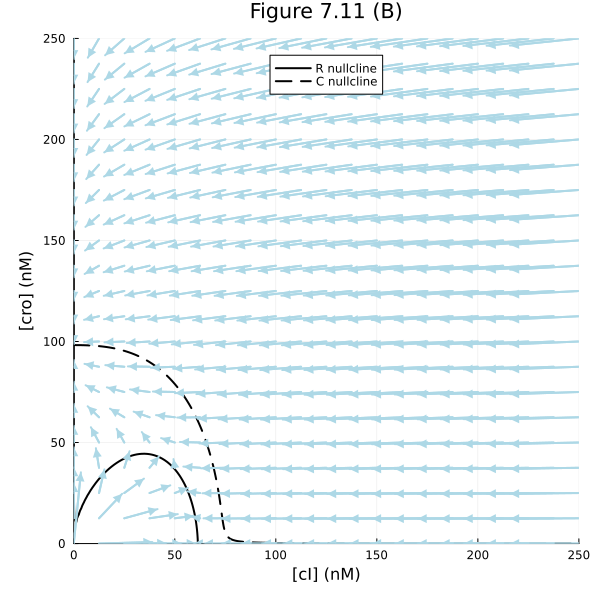

In [4]:
prob2 = remake(prob, p = [sys.delta_r => 0.2])

rx = range(0, 250, 201)
ry = range(0, 250, 201)
rxy = range(0, 250, 21)
xx = [x for y in rxy, x in rxy]
yy = [y for y in rxy, x in rxy]

∂R2 = (x, y) -> prob2.f([x, y], prob2.p, nothing)[1]
∂C2 = (x, y) -> prob2.f([x, y], prob2.p, nothing)[2]

∂F2 = function (x, y; scale=0.2)
    dR, dC = prob2.f([x, y], prob2.p, nothing)
    s = sqrt(hypot(dR, dC)) * scale
    return (dR / s, dC / s)
end

fig = plot(title="Figure 7.11 (B)")
contour!(fig, rx, ry, ∂R2, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="R nullcline")
contour!(fig, rx, ry, ∂C2, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="C nullcline")
quiver!(fig, xx, yy, quiver=∂F2, line=(:lightblue), arrow=(:closed))

plot!(fig, xlims=(0, 250), ylims=(0, 250), xlabel="[cI] (nM)", ylabel="[cro] (nM)", aspect_ratio=:equal, legend=:top, size=(600, 600))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*